In [7]:
# import the necessary packages
from __future__ import print_function
from imutils import perspective
from imutils import contours
import numpy as np

import argparse
import imutils
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
def order_points_old(pts):
    # initialize a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype="float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect



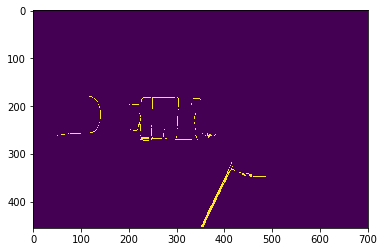

In [19]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-n", "--new", type=int, default=-1,help="whether or not the new order points should should be used")
#args = vars(ap.parse_args())

# load our input image, convert it to grayscale, and blur it slightly
image = cv2.imread("JENSAviewer_cropped.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
#cv2.imshow("Edged", edged)
plt.imshow(edged)

Object #2:
[[201 272]
 [200 181]
 [354 179]
 [355 271]]
[[200 181]
 [354 179]
 [355 271]
 [201 272]]

Object #6:
[[366 461]
 [349 453]
 [414 316]
 [431 324]]
[[414 316]
 [431 324]
 [366 461]
 [349 453]]



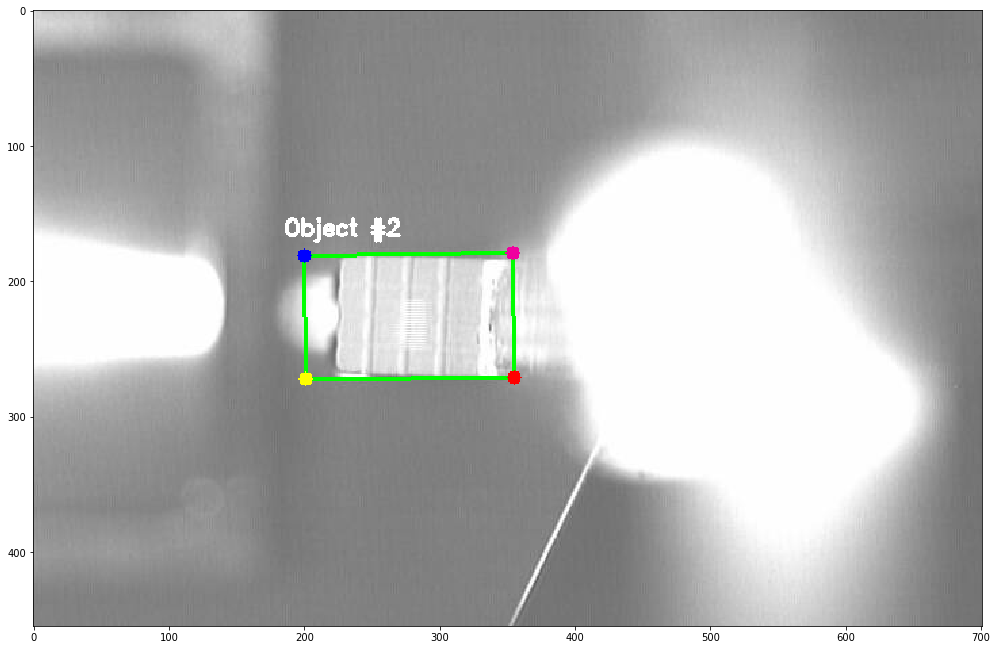

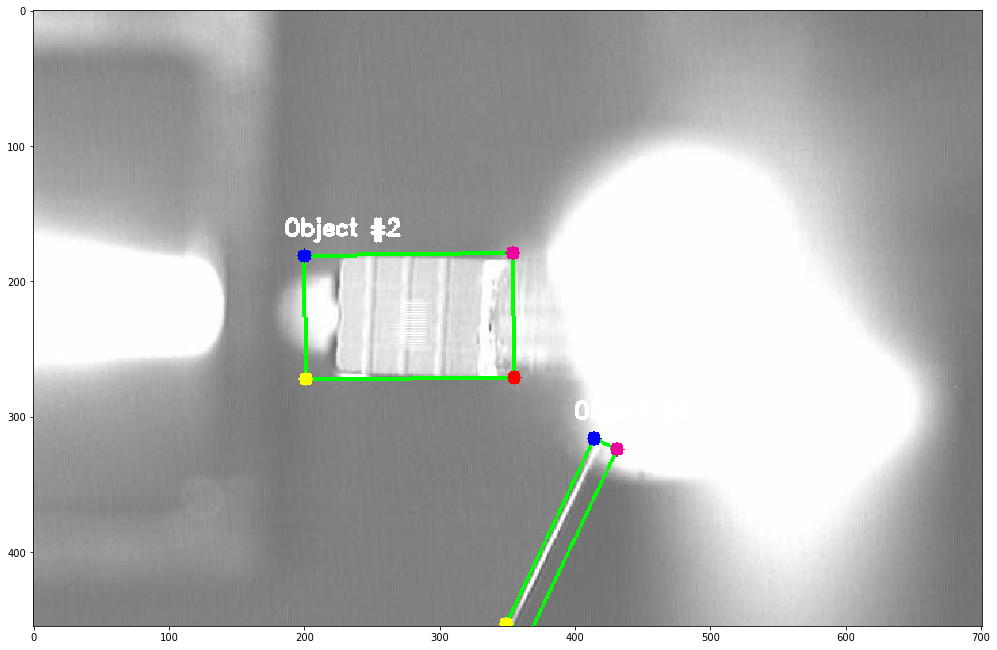

In [20]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# sort the contours from left-to-right and initialize the bounding box
# point colors
(cnts, _) = contours.sort_contours(cnts)
colors = ((0, 0, 255), (240, 0, 159), (255, 0, 0), (255, 255, 0))

# loop over the contours individually
for (i, c) in enumerate(cnts):
	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue

	# compute the rotated bounding box of the contour, then
	# draw the contours
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	cv2.drawContours(image, [box], -1, (0, 255, 0), 2)

	# show the original coordinates
	print("Object #{}:".format(i + 1))
	print(box)

	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	rect = order_points_old(box)

	# check to see if the new method should be used for
	# ordering the coordinates
	#if args["new"] > 0:
	#	rect = perspective.order_points(box)

	# show the re-ordered coordinates
	print(rect.astype("int"))
	print("")

	# loop over the original points and draw them
	for ((x, y), color) in zip(rect, colors):
		cv2.circle(image, (int(x), int(y)), 5, color, -1)

	# draw the object num at the top-left corner
	cv2.putText(image, "Object #{}".format(i + 1),
		(int(rect[0][0] - 15), int(rect[0][1] - 15)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 255, 255), 2)

	# show the image
	fig=plt.figure(figsize=(17,15))

	plt.imshow(image)#cv2.imshow("Image", image)
        
	#cv2.waitKey(0)
